Import basic libraries for EDA 

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We create the three DataSets that we will be exploring.

In [200]:
steam = pd.read_csv('./data/steam.csv')
items = pd.read_parquet('./data/items.parquet')
review = pd.read_parquet('./data/review.parquet')

We start the EDA process by checking what our `Steam` dataset is made of.

In [201]:
steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32132 entries, 0 to 32131
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        28850 non-null  object 
 1   title         30083 non-null  object 
 2   release_date  29781 non-null  object 
 3   tags          31970 non-null  object 
 4   price         32132 non-null  float64
 5   id            32132 non-null  int64  
 6   developer     28834 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.7+ MB


In [202]:
steam.head(3)

,genres,title,release_date,tags,price,id,developer
0,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.99,761140,Kotoshiro
1,"['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",0.00,643980,Secret Level SRL
2,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",0.00,670290,Poolians.com


We use the describe method to see important data. 

In [203]:
steam['price'].describe(percentiles = [.25, .50, .75]).apply('{0:.4f}'.format)

count    32132.0000
mean         8.4846
std         15.6601
min          0.0000
25%          1.9900
50%          4.9900
75%          9.9900
max        995.0000
Name: price, dtype: object

We see that there are 32132 games in our DataSet, we check for any empty value which is **different** from a zero value.

In [204]:
print(f"There are {steam['id'].isna().sum()} null values.")

There are 0 null values.


#### Now we have to calculate these values in order to verify the existance of any outlier values.

#### We use the Interquartile range (IQR) which is used to describe the dispersion of a DataSet.
#### IQR = Q3 - Q1, which represents roughly 50% of the data.

In [205]:
standardDeviation = np.std(steam['price'])
meanPrice = np.mean(steam['price'])
print(f"Standar Deviation[σ]: {standardDeviation:.2f}\nMean Price: {meanPrice:.2f}")

Standar Deviation[σ]: 15.66
Mean Price: 8.48


In [206]:
prices = steam['price'].sort_values(ascending = True)
Q1 = np.percentile(prices, 25)
Q3 = np.percentile(prices, 75)
IQR = Q3 - Q1
print(f"First Quartile: {Q1}\nThird Quartile: {Q3}\nIQR: {IQR}")

First Quartile: 1.99
Third Quartile: 9.99
IQR: 8.0


Now that we have the first and third quartile, we can calculate the values that are out of bounds.

In [207]:
minimum = Q1 - 1.5 * IQR
maximum = Q3 + 1.5 * IQR
print(f"Minimum: {minimum:.2f}\nMaximum: {maximum:.2f}")

Minimum: -10.01
Maximum: 21.99


In [208]:
minOutlier = steam[steam['price'] < Q1]
maxOutlier = steam[steam['price'] > Q3]

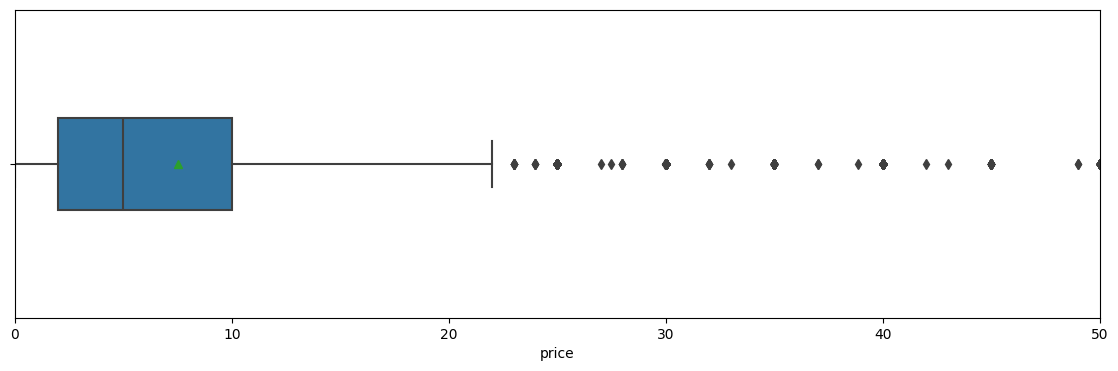

In [209]:
plt.figure(figsize = (14, 4))
sns.boxplot(x = 'price' , orient = 'h', width= 0.3, data = steam[steam['price'] < 50], showmeans = True)
plt.xlim(0,50)
plt.show()

In [210]:
outliersCount = steam[steam['price'] > maximum].count()
outliersCount

genres          1746
title           1760
release_date    1749
tags            1870
price           1873
id              1873
developer       1742
dtype: int64

Since the ID column has unique values, we can confirm that there are 1873 games that their price is higher than $22

#### `Conclusions`
 - We can see that most games are cheaper than $10.
 - Prices higher than 22 are considered outliers
 - 50% of games are $8.48 or less
 - There are 1873 outliers (Games more expensive than $22)